In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [2]:
df = pd.read_csv("C:/dataset/WHO-COVID-19-global-data.csv")

In [3]:
df.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
m = folium.Map(tiles = 'Stamen Terrain',min_zoom = 0.5)
display(m)

In [5]:
df.isnull().sum()

Date_reported          0
Country_code         908
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215196 entries, 0 to 215195
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      215196 non-null  object
 1   Country_code       214288 non-null  object
 2   Country            215196 non-null  object
 3   WHO_region         215196 non-null  object
 4   New_cases          215196 non-null  int64 
 5   Cumulative_cases   215196 non-null  int64 
 6   New_deaths         215196 non-null  int64 
 7   Cumulative_deaths  215196 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 13.1+ MB


In [7]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.151960e+05,2.151960e+05,215196.000000,2.151960e+05
mean,2.519511e+03,7.277700e+05,29.411676,1.272805e+04
std,1.635961e+04,3.745203e+06,158.794867,5.828145e+04
min,-3.295200e+04,0.000000e+00,-2440.000000,0.000000e+00
25%,0.000000e+00,3.110000e+02,0.000000,3.000000e+00
50%,2.300000e+01,1.371400e+04,0.000000,1.730000e+02
75%,4.880000e+02,1.969795e+05,6.000000,3.115000e+03
max,1.255249e+06,8.599746e+07,11447.000000,1.006143e+06


In [8]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [9]:
def plotDot(point):
    folium.CircleMaker(location = (point.latitude, point.longitude),
                      radius = 5,
                      weight = 2,
                      popup = [point.Country, point.Confirmed, point.Recovered],
                      fill_color = '#000000').add_to(m)
    df.aply(plotDot,axis = 1)
    m.fit_bounds(m.get_bounds())
    m

In [10]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
215191,2022-06-24,ZW,Zimbabwe,AFRO,110,255246,4,5546
215192,2022-06-25,ZW,Zimbabwe,AFRO,63,255309,3,5549
215193,2022-06-26,ZW,Zimbabwe,AFRO,46,255355,0,5549
215194,2022-06-27,ZW,Zimbabwe,AFRO,0,255355,0,5549
215195,2022-06-28,ZW,Zimbabwe,AFRO,0,255355,0,5549


# Relating the variable with scatterplots


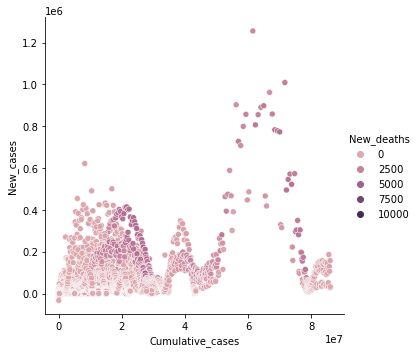

In [18]:
sns.relplot(data=df, x="Cumulative_cases", y="New_cases", hue='New_deaths')



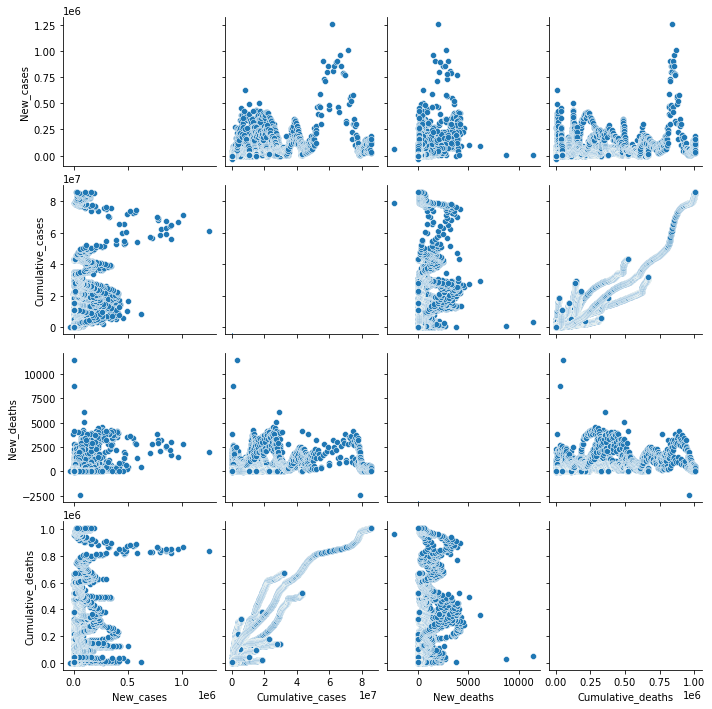

In [19]:
sns.pairplot(df)